## AirBnB Sentiment Analysis

#### Dataset

The data taken from Airbnb for Denver:

- List : Contains the description of review and ratings
- Reviews: contains ID for reviewer and comments 
    
The sentiment analysis uses NLTK, which is a powerful language tool to analyze text data.

#### Import & Overview of dataset

In [2]:
import pandas as pd 
#Load Dataset

denver_raw_list = pd.read_csv("csv/listings.csv") 
denver_raw_review = pd.read_csv("csv/reviews.csv") 

In [3]:
#Look at the first rows from Listings and Review dataset

display(denver_raw_list.head(3),denver_raw_review.head(3))

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20210930023319,2021-09-30,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,https://www.airbnb.com/users/show/615,...,4.93,4.84,4.77,2016-BFN-0004968,f,2,2,0,0,1.50
1,360,https://www.airbnb.com/rooms/360,20210930023319,2021-09-30,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,https://www.airbnb.com/users/show/666,...,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,8.30
2,364,https://www.airbnb.com/rooms/364,20210930023319,2021-09-30,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,https://www.airbnb.com/users/show/783,...,4.96,4.65,4.71,NaN,f,1,1,0,0,0.68


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,177,99461681,2016-09-04,78348548,Brenna,"Great place to stay! Definitely a tiny home, b..."
1,177,101460574,2016-09-13,72125554,Rachael,Joe was very friendly and gave us all the info...
2,177,101681475,2016-09-14,21300329,Haley,Amazing property and Joe was a great host! Eve...


#### Combine dataset (setup was originally intended for combining dataset of multiple cities)
- I initially intended to set this up in order to combine denver's data with other cities, but ultimately only used Denver's dataset.

In [24]:
#Label each area
denver_raw_list['area'] = 'denver'
denver_raw_review['area'] = 'denver'

#Union all the cities dataset
concat_list_df = pd.concat([denver_raw_list], ignore_index=True)
concat_review_df = pd.concat([denver_raw_review], ignore_index=True)

In [25]:
concat_list_df.groupby('area')["review_scores_rating"].describe().transpose()

area,denver
count,3255.000000
mean,4.818187
std,0.377739
min,0.000000
25%,4.790000
50%,4.910000
75%,5.000000
max,5.000000


#### All service aspects have Positive Review

Airbnb have various aspects of customer experience such as check-in experience, room cleanliness,  location, communication, and also value.

In the chart, all aspects also have positive rating business should maintain these effort to keep customers renting out their listings.

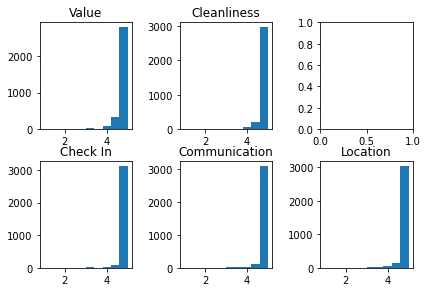

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(concat_list_df["review_scores_value"]) #row=0, col=0
ax[0, 0].set_title('Value')
ax[1, 0].hist(concat_list_df["review_scores_checkin"]) #row=1, col=0
ax[1, 0].set_title('Check In')
ax[0, 1].hist(concat_list_df["review_scores_cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Cleanliness')
ax[1, 1].hist(concat_list_df["review_scores_communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(concat_list_df["review_scores_location"]) #row=1, col=2
ax[1 ,2].set_title('Location')
plt.show()

In [30]:
concat_list_df.columns
concat_review_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'area'],
      dtype='object')

### What are customers mostly saying


We have checked that most customers have a great experience during the stay. 

In all aspects, the scores was pretty high.

It's interesting to also look at the most frequent words from the comments.

### Fill Missing Reviews as Blank

In [31]:
#count missing values
concat_review_df['comments'].isnull().sum()

147

There are 147 rows that have missing values and we fill it with blanks.

If we did not perform Missing Value Treatment (MVT), performing word count will occur error.

It's safe to fill it with blanks, since customer did not leave review about their stay.

In [32]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

denver_review = convert(concat_review_df['comments'].fillna("")) #Fill in missing reviews with blank
denver_review


['great',
 'place',
 'to',
 'stay!',
 'definitely',
 'a',
 'tiny',
 'home,',
 'but',
 'still',
 'cozy',
 'and',
 'comfortable.',
 'pretty',
 'fun',
 'to',
 'try',
 'it',
 'out',
 'for',
 'a',
 'couple',
 'nights',
 'for',
 'the',
 'two',
 'of',
 'us.',
 'joe',
 'was',
 'helpful',
 'and',
 'friendly.',
 'destinations',
 'were',
 'always',
 'less',
 'than',
 'a',
 '20min',
 'drive',
 'and',
 'lots',
 'of',
 'parks',
 'nearby!',
 'super',
 'fun',
 'stay',
 ':)',
 'joe',
 'was',
 'very',
 'friendly',
 'and',
 'gave',
 'us',
 'all',
 'the',
 'information',
 'we',
 'needed.',
 'the',
 'house',
 'was',
 'exactly',
 'as',
 'described',
 'on',
 'the',
 'site.',
 'it',
 'was',
 'fun',
 'and',
 'thought',
 'provoking',
 'experiencing',
 'a',
 '100%',
 'eco-friendly',
 'space.',
 'we',
 'plan',
 'on',
 'staying',
 'here',
 'again',
 'next',
 'time',
 "we're",
 'in',
 'denver!',
 'amazing',
 'property',
 'and',
 'joe',
 'was',
 'a',
 'great',
 'host!',
 'even',
 'offered',
 'to',
 'walk',
 'my',
 '

The texts also lowered to avoid overlapping words that have similar intention.

Then, split each word to count their frequency

### Word Frequency

In [10]:
count_word = collections.Counter(denver_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,and,434612
1,the,374436
2,to,272626
3,a,261181
4,was,235110


The word frequency runs well, but we cannot understand what these words mean.

We wouldn't want these words showed up and we can remove them with `nltk` library

# Removing Stopwords

Stopwords are common in any language.

But we should remove them when analyzing text data, as this doesn't add much value for our analysis

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
stop_words = set(stopwords.words(['dutch','english']))

# View a few words from the set
list(stop_words)[0:10]

['altijd', 'om', 'too', 'just', 'again', 'above', 'y', 'niet', 'have', 'hem']

Here's some examples of english and dutch stopwords and we'll remove them 

In [16]:
words_review_cleaned = [word for word in denver_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

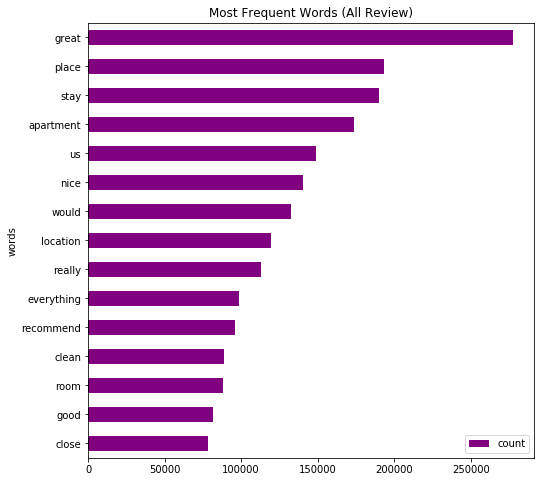

In [163]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

Notice that the result improved by producing more meaningful words

As the rating suggests, most review expresses positive service.

Some of the aspects was mentionted, such as  _"Great"_  , _"Location"_ , _"Recommend"_ , _"Clean"_ , _"Close"_


#### Sentiment Analysis to detect good/bad Reviews

Sentiment analysis is the process of identifying people's attitude and emotional states from a language.

In the application, it able to classify good/bad reviews.

It is a technique uses for natural language processing to interpret and classify emotions.

The output would summarize the positive, negative, or neutral sentiment of these reviews.


But it's easier for us to find a bad review using this approach when there's a lot of data

We will be using `nltk` from python to analyze the data

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for sentence in concat_review_df['comments'].values[1:3]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Joe was very friendly and gave us all the information we needed. The house was exactly as described on the site. It was fun and thought provoking experiencing a 100% Eco-friendly space. We plan on staying here again next time we're in Denver!
compound: 0.7419, neg: 0.038, neu: 0.814, pos: 0.148, 
Amazing property and Joe was a great host! Even offered to walk my dog while we were out! Will definitely be back
compound: 0.9039, neg: 0.0, neu: 0.617, pos: 0.383, 


Let's look at some of the comment example, and how `nltk` determines a review

`compound` is the normalized weighted score.

The metric is useful when determining a uni-dimensional sentiment over a sentence.

A positive or negative sentiment being +1 as the most positive and -1 as the most negative

The `pos`, `neu`, and `neg` scores are ratios for proportions of text that fall in each category (the values will add up to 1 if summed) . These metrics are useful if we want a multi-dimensional sentiment over a sentence.


More information about the sentiment analysis scoring: [scoring](https://github.com/cjhutto/vaderSentiment)

In [36]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

# reviews_f = [r for r in concat_review_df['comments'] if pd.notnull(r) and get_language(r) in ['dutch','english']]

# pscores = [sid.polarity_scores(comment) for comment in reviews_f]

In [39]:
reviews_f = [r for r in concat_review_df['comments'] if pd.notnull(r) and get_language(r) in ['dutch','english']]

In [ ]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

##### Compound Scores

Text(0, 0.5, 'frequency')

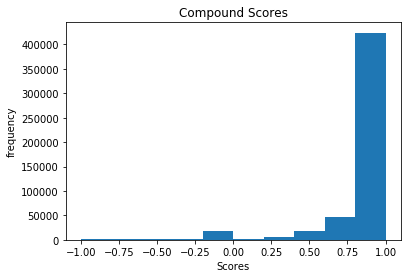

In [177]:
#Histogram plot neutral
pd.Series([score['compound'] for score in pscores]).plot(kind='hist')

plt.title('Compound Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Neutral Scores

Text(0, 0.5, 'frequency')

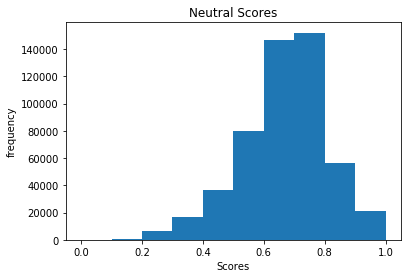

In [166]:
#Histogram plot neutral
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

plt.title('Neutral Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Positive Scores

Text(0, 0.5, 'frequency')

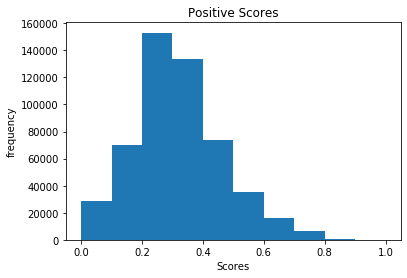

In [167]:
#Histogram plot positive
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

plt.title('Positive Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Negative Scores

Surprisingly, the negative scores was mostly zero.

This implies that indeed the experience was pleasant for most Airbnb stay.

Text(0, 0.5, 'frequency')

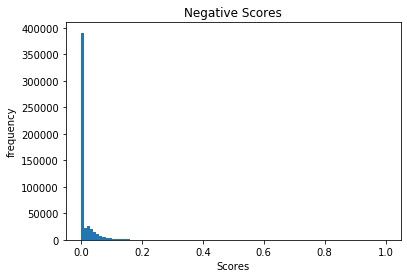

In [168]:
#Histogram plot negative
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

plt.title('Negative Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

In [169]:
#Create dataframe for sentiment analysis
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) in ['dutch','english']]
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [214]:
130700/len(scored_reviews)

0.25230734779998415

In [ ]:
scored_reviews.query('positivity > 0')

In [ ]:
scored_reviews.query('negativity > positivity').query('compound > 0.2')

##### Overall Sentiment performance was good

- We have looked at some extreme cases where there's a lack of accuracy in the score. 

- But, NLTK's general performance to classify the review was great. Utilizing the compound score, most sentiment classifies well.

- Next, if we wanted to look at the performance consistency, another dataset that has a mixed review should be tested.

#### Summary & Future Work

- Airbnb has a pleasant experience when using the service, the ratings were ±90%
- Reviews have missing values and treated with filling in blanks
- Data cleaning with removing stopwords is essential to find the most frequent word
- NLTK able to classify the sentiment category well enough. But, sometimes would need human assistance to improve its accuracy in a fraction of cases
- Business should take action for the bad review from the negative score and reading customers' complaints. 
- For future research, we need to compare other datasets that have mixed reviews.